In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("Diabetes with Population Info by County 2017.csv") # importing data

In [12]:
data.head() #checking data out

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [13]:
data.info(verbose = True) #checking data types and variables, 
                          # seems like Diabetes_Number (and some others) are not integers...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

In [14]:
data.Diabetes_Number = data.Diabetes_Number.astype(int) # gets error bc of "No Data" value, not coercable to an integer

ValueError: invalid literal for int() with base 10: 'Suppressed'

In [15]:
clean = data[data.Diabetes_Number != "Suppressed"] 
clean = clean[clean.Obesity_Number != "No Data"]
clean = clean[clean.iloc[:,6] != "-"]
# cleaning data to drop these rows bc we can't do anything with them

In [16]:
clean.iloc[:,3:6] = clean.iloc[:,3:6].astype(int) 
clean.iloc[:,6] = clean.iloc[:,6].astype(float)
# making all number columns into integer or float data types

In [17]:
clean.info(verbose = True) # double checking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3112 non-null   object 
 1   State                                                                                                                                                 3112 non-null   object 
 2   CountyFIPS                                                                                                                                            3112 non-null   int64 

In [18]:
clean.select_dtypes(include = "object").head()

,County,State
0,Autauga County,Alabama
1,Baldwin County,Alabama
2,Barbour County,Alabama
3,Bibb County,Alabama
4,Blount County,Alabama


From https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

Risk factors for prediabetes and type 2 diabetes

Researchers don't fully understand why some people develop prediabetes and type 2 diabetes and others don't. It's clear that certain factors increase the risk, however, including:

Weight. The more fatty tissue you have, the more resistant your cells become to insulin.
Inactivity. The less active you are, the greater your risk. Physical activity helps you control your weight, uses up glucose as energy and makes your cells more sensitive to insulin. 

Family history. Your risk increases if a parent or sibling has type 2 diabetes.

Race or ethnicity. Although it's unclear why, certain people — including Black, Hispanic, American Indian and Asian American people — are at higher risk.

Age. Your risk increases as you get older. This may be because you tend to exercise less, lose muscle mass and gain weight as you age. But type 2 diabetes is also increasing among children, adolescents and younger adults.

Gestational diabetes. If you developed gestational diabetes when you were pregnant, your risk of developing prediabetes and type 2 diabetes later increases. If you gave birth to a baby weighing more than 9 pounds (4 kilograms), you're also at risk of type 2 diabetes.

Polycystic ovary syndrome. For women, having polycystic ovary syndrome — a common condition characterized by irregular menstrual periods, excess hair growth and obesity — increases the risk of diabetes.
High blood pressure. Having blood pressure over 140/90 millimeters of mercury (mm Hg) is linked to an increased risk of type 2 diabetes.

Abnormal cholesterol and triglyceride levels. If you have low levels of high-density lipoprotein (HDL), or "good," cholesterol, your risk of type 2 diabetes is higher. Triglycerides are another type of fat carried in the blood. People with high levels of triglycerides have an increased risk of type 2 diabetes. Your doctor can let you know what your cholesterol and triglyceride levels are.

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Graphs
Y axis is always diabetes rates (diabetes number divided by total population) in these scatter plots. 

Looking at a few different potential relationships based on the Mayo clinic info (obesity, physical inactivity, age, and race/ethnicity). 

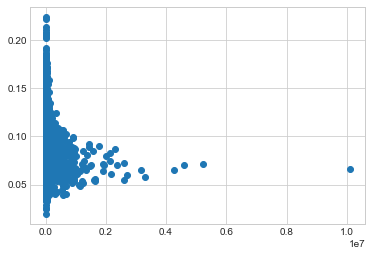

In [135]:
plt.plot(clean.iloc[:,7], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# just trying to see if population size itself is correlated w/ diabetes rates 
# (it's not lol)

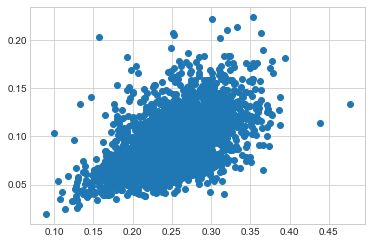

In [136]:
plt.plot(clean.Obesity_Number.astype(int)/clean.iloc[:,64], clean.Diabetes_Number/clean.iloc[:,64], 'o');

# Seems like somewhat linear relationship between obesity rates and diabetes rates? 



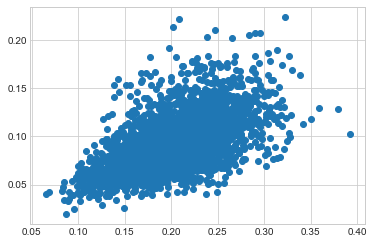

In [137]:
plt.plot(clean.Physical_Inactivity_Number/clean.iloc[:,64], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# Relationship between physical inactivity rates and diabetes rates
# Somewhat linear too!

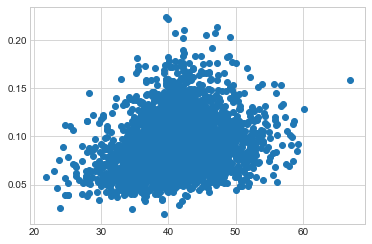

In [138]:
plt.plot(clean.iloc[:,81], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# looks like median age doesn't say too much

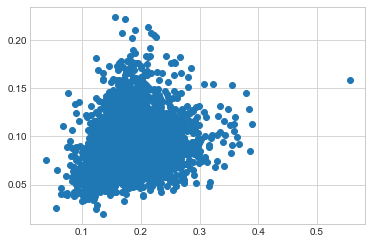

In [140]:
plt.plot(clean.iloc[:,87]/clean.iloc[:,64], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# proportion of population 65 yrs and older
# vaguely linear...

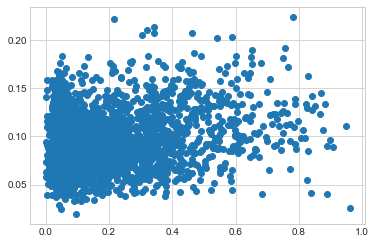

In [141]:
whiteproportion = clean.iloc[:,11]/clean.iloc[:,7]

plt.plot((1 - whiteproportion), clean.Diabetes_Number/clean.iloc[:,64], 'o');

# the proportion of the county population that is NOT monoracial white 
# doesn't seem to be strongly correlated

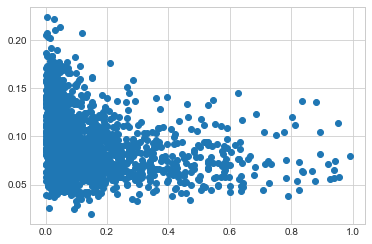

In [142]:
hispanicproportion = clean.iloc[:,45]/clean.iloc[:,44]
plt.plot(hispanicproportion, clean.Diabetes_Number/clean.iloc[:,44], 'o');
# proportion of county population that is hispanic (of any race)

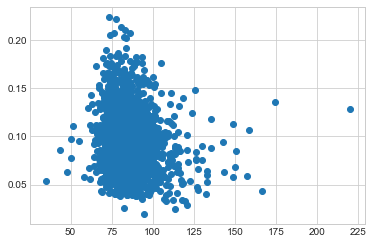

In [169]:
plt.plot(clean.iloc[:,6], clean.Diabetes_Number/clean.iloc[:,44], 'o');
# sex ratio (males per 100 females), above 65
# also doesn't seem to be strongly correlated

# Prepare to fit models

In [244]:
X = clean.drop(["County", "CountyFIPS", "Diabetes_Number"], 1) # dropping county labels and the dependent variable
X = pd.get_dummies(X) # dummifying the state feature (I think we want to include this? Could also see a case 
                      #     for dropping it)

Y = clean.Diabetes_Number

In [248]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# this will check multicollinearity, high values of the Variance Inflation Factor (VIF) suggests
# that those variables are highly correlated
# I expect that bc a bunch of the features are just sums of the others, we'll need to get rid of a some...

from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)


/Users/paul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                               feature         VIF
0                                       Obesity_Number  465.542480
1                           Physical_Inactivity_Number  316.738854
2    sex and age_total population_65 years and over...    2.055066
3                       race_total population_one race         inf
4              race_total population_two or more races         inf
..                                                 ...         ...
133                                     State_Virginia   13.167036
134                                   State_Washington    5.144047
135                                State_West Virginia    6.419770
136                                    State_Wisconsin    8.455199
137                                      State_Wyoming    3.129353

[138 rows x 2 columns]


In [249]:
with pd.option_context("display.max_rows", 1000):
    display(vif_data)

,feature,VIF
0,Obesity_Number,4.655425e+02
1,Physical_Inactivity_Number,3.167389e+02
2,sex and age_total population_65 years and over...,2.055066e+00
3,race_total population_one race,inf
4,race_total population_two or more races,inf
5,race_total population_one race_1,inf
6,race_total population_one race_white,inf
7,race_total population_one race_black or africa...,inf
8,race_total population_one race_american indian...,inf
9,race_total population_one race_american indian...,2.021310e+00


In [247]:
X.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3219
Data columns (total 138 columns):
 #   Column                                                                                                                                                Dtype  
---  ------                                                                                                                                                -----  
 0   Obesity_Number                                                                                                                                        int64  
 1   Physical_Inactivity_Number                                                                                                                            int64  
 2   sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                      float64
 3   race_total population_one race                                          

In [246]:
# going to have to drop the total sum features one by one, I guess... wish I knew python better lol 
# [3, 40, 57, 60]

X = X.drop(X.columns[[3, 40, 57, 60]], axis = 1)